In [1]:
from datetime import datetime
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import geopy.distance
from matplotlib.ticker import MultipleLocator

import xarray as xr
from ormhw.core import NH_LINE, CE01, CE02, CE04

In [2]:
years = range(2015,2024)
figsize = (3,3)
dpi = 600
filename = 'chl_gradient'
filetype = 'jpg'
matplotlib.rcParams.update({'font.size': 8})

In [3]:
oc = xr.open_dataset('/home/jovyan/data/nasa/oc_2015-2023.nc')
oc = oc.sel(latitude = NH_LINE.lat, method = 'nearest')

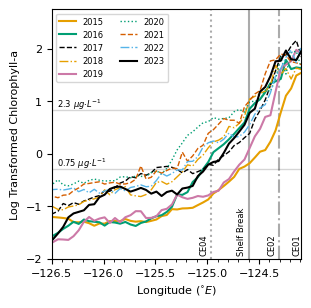

In [4]:
fig, ax = plt.subplots(1,1, figsize = figsize, constrained_layout = True)
plt_colors = [(230,159,0), (0,158,115),(0,0,0),(230,159,0),(204,121,167), (0,158,115),(213,94,0),(86,180,233),(0,0,0)]
plt_width = [1.5,1.5,1,1,1.5,1,1,1,1.5]
plt_styles = ['-', '-','--','-.','-',':','--', '-.','-']

for year in years:
    idx = years.index(year)
    subds = oc.sel(time = slice(datetime(year,7,9),datetime(year,10,8,23,59,59)))
    subds = subds[['chl']].mean(dim = 'time')
    new_lons = np.arange(subds.longitude.min(), subds.longitude.max(), 0.05)
    _interp = subds.interp({'longitude': new_lons})
    
    lon = _interp.longitude
    logchl = np.log(_interp.chl)  
    ax.plot(lon, logchl, label = str(year), color = [v/255 for v in plt_colors[idx]], linewidth = plt_width[idx],linestyle = plt_styles[idx])

ax.set_xlim(-126.5,CE01.lon)
ax.set_ylim(-2,2.75)
ax.xaxis.set_major_locator(MultipleLocator(0.5))
ax.xaxis.set_minor_locator(MultipleLocator(0.1))
ax.set_box_aspect(1)


ax.axhline(np.log(0.75), linestyle = '-', color = 'gray', alpha = 0.33, linewidth = 1, zorder = 0)
plt.text(-126.45,round(np.log(0.75),2) + 0.05, r'$0.75\ {\mu}g{\cdot}L^{-1}$', fontsize = 6)

ax.axhline(np.log(2.3), linestyle = '-', color = 'gray', alpha = 0.33, linewidth = 1, zorder = 0)
plt.text(-126.45,round(np.log(2.3),2) + 0.05,r'$2.3\ {\mu}g{\cdot}L^{-1}$', fontsize = 6)

ax.axvline(CE04.lon, linestyle = ':', color = 'black', alpha = 0.33, zorder = 0)
plt.text(CE04.lon - 0.11,-1.9,'CE04', rotation = 90, fontsize = 6)

ax.axvline(CE02.lon, linestyle = 'dashdot', color = 'black', alpha = 0.33, zorder = 0)
plt.text(CE02.lon - 0.11,-1.9,'CE02', rotation = 90, fontsize = 6)

ax.axvline(-124.6, linestyle = '-', color = 'black', alpha = 0.33, zorder = 0)
plt.text(-124.6 - 0.11,-1.9,'Shelf Break', rotation = 90, fontsize = 6)

plt.text(CE01.lon - 0.08,-1.9,'CE01', rotation = 90, fontsize = 6)

ax.set_xlabel(r'Longitude ($^{\circ}E$)')
ax.set_ylabel('Log Transformed Chlorophyll-a')
ax.legend(loc = 'upper left', ncol = 2, fontsize = 6)

plt.savefig(f'/home/jovyan/oregon-shelf-mhw/figures/{filename}.{filetype}', dpi = dpi)

## LaTeX Output

In [5]:
print('Year', '&', r'$0.75\ {\mu}g{\cdot}L^{-1}$', '&', r'$2.3\ {\mu}g{\cdot}L^{-1}$', r'\\\\', "\hline")

for year in years: 
    _oc = oc.sel(time = slice(datetime(year,7,9),datetime(year,10,8,23,59,59)))
    _oc = _oc[['chl']].mean(dim = 'time')

    yriso1 = _oc.where((_oc.chl-0.75 <= 0 ), drop = True).longitude.max()
    delta1 = geopy.distance.geodesic((44.652,-124.6), (44.652, yriso1.values)).km
    if yriso1.values > -124.6:
        delta1 = -1 * delta1
    
    
    yriso2 = _oc.where((_oc.chl-2.3 <- 0 ), drop = True).longitude.max()    
    delta2 =  geopy.distance.geodesic((44.652,-124.6), (44.652, yriso2.values)).km
    if yriso2.values > -124.6:
        delta2 = -1 * delta2
        
    delta1 = round(delta1)
    delta2 = round(delta2)

    
    if delta1 > 0:
        d1 = f"+{delta1}"
    else:
        d1 = delta1
    if delta2 > 0:
        d2 = f"+{delta2}"
    else:
        d2 = delta2
        
    print(year,'&',d1,'&', d2, '\\\\')


Year & $0.75\ {\mu}g{\cdot}L^{-1}$ & $2.3\ {\mu}g{\cdot}L^{-1}$ \\\\ \hline
2015 & +6 & -25 \\
2016 & +35 & +1 \\
2017 & +35 & -9 \\
2018 & +49 & +2 \\
2019 & +9 & -18 \\
2020 & +63 & +2 \\
2021 & +57 & +4 \\
2022 & +51 & -6 \\
2023 & +34 & -3 \\


<>:1: SyntaxWarning: invalid escape sequence '\h'
<>:1: SyntaxWarning: invalid escape sequence '\h'
/tmp/ipykernel_1094/2890543129.py:1: SyntaxWarning: invalid escape sequence '\h'
  print('Year', '&', r'$0.75\ {\mu}g{\cdot}L^{-1}$', '&', r'$2.3\ {\mu}g{\cdot}L^{-1}$', r'\\\\', "\hline")
